# Perceptron Algorithm


```

```
***************************************************

In [6]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [2]:
def activation(x):
    return 1.0 if x >= 0 else 0.0

In [3]:
def update_weight(w, learning_rate, target, output, x=1):
    return w + learning_rate * (target - output)*x

In [4]:

def train_perceptron(traing_data, testing_data, eta, epochs):

    w1 = np.random.rand()*np.random.randint(low=-1, high=1)
    w2 = np.random.rand()*np.random.randint(low=-1, high=1)
    b = np.random.rand()*np.random.randint(low=-1, high=1)

    # iter = 0
    flag = True
    while flag:
        # iter += 1
        flag = False
        for row in traing_data.iterrows():

            output = activation(w1*row[1]['x1']+w2*row[1]['x2']+b)

            target = row[1]['y']
            w1 = update_weight(w1, eta, target, output,
                               row[1]['x1'])
            w2 = update_weight(w2, eta, target, output, row[1]['x2'])
            b = update_weight(b, eta, target, output)
            # print(target, output)
            if target != output:
                flag = True

    print(f"Final weights: {w1}, {w2}, {b}")

    for row in testing_data.iterrows():
        output = activation(w1*row[1]['x1']+w2*row[1]['x2']+b)
        print(f"output: {output}, target: {row[1]['y']}")

    return w1, w2, b


Final weights: 0.16719310180491942, 0.23500000000000024, -0.30000000000000004
output: 0.0, target: 0.0
output: 1.0, target: 1.0


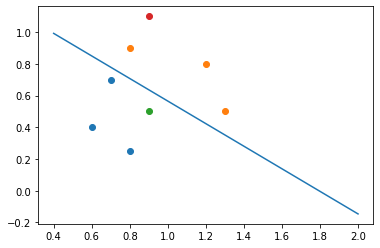

In [7]:
data = pd.read_csv('./perceptron.csv')
traing_data = data[:6]
testing_data = data[6:]



eta = 0.1
epoch = 100

w1, w2, b = train_perceptron(traing_data, testing_data, eta, epoch)


plt.scatter(traing_data[traing_data['y'] == 0]['x1'], traing_data[traing_data['y'] == 0]['x2'])
plt.scatter(traing_data[traing_data['y'] == 1]['x1'], traing_data[traing_data['y'] == 1]['x2'])
plt.scatter(testing_data[testing_data['y'] == 0]['x1'], testing_data[testing_data['y'] == 0]['x2'])
plt.scatter(testing_data[testing_data['y'] == 1]['x1'], testing_data[testing_data['y'] == 1]['x2'])

linex = np.linspace(0.4, 2, 50)
liney = (-w1/w2)*linex-(b/w2)

plt.plot(linex, liney)

plt.show()
